In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import LancasterStemmer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("spam.csv")

In [9]:
df = df[['v1', 'v2']]

In [10]:
df.columns = ['Label', "Text"]

In [13]:
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [22]:
df['Len']=df['Text'].apply(len)

/Users/mohituniyal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


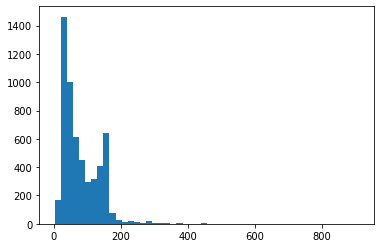

In [30]:
a = plt.hist(df['Len'], bins = 50)

## Cleaning Dataset

In [87]:
ls = LancasterStemmer()

In [88]:
sw = set(stopwords.words('english'))

In [92]:
# Stemming
# Stopword remove

def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-z]+", " ", text)
    text = word_tokenize(text)
    text = [ ls.stem(t) for t in text if t not in sw and len(t)>2]
    text = " ".join(text)
    return text

In [93]:
df['Text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [94]:
clean_text(df["Text"][2])

'fre entry wkly comp win cup fin tkts may text receiv entry quest std txt rat apply'

In [96]:
df['Cleaned_Text'] = df['Text'].apply(clean_text)

/Users/mohituniyal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
X = df['Cleaned_Text'].values

In [106]:
X[-1]

'rofl tru nam'

In [107]:
df['Label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object

In [117]:
le = LabelEncoder()
y = le.fit_transform(df['Label'])

In [118]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [137]:
cv = CountVectorizer(max_features=5000)

In [138]:
X_corpus = cv.fit_transform(X)

In [139]:
X_corpus.shape

(5572, 5000)

In [140]:
X_corpus = X_corpus.toarray()

In [142]:
X_corpus

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Split Dataset

In [143]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_corpus, y, test_size=0.2, random_state=42)

In [146]:
X_train.shape

(4457, 5000)

In [148]:
X_test.shape

(1115, 5000)

### Model

In [149]:
from sklearn.naive_bayes import MultinomialNB

In [150]:
mnb = MultinomialNB()

In [151]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [152]:
mnb.score(X_train, y_train)

0.9899035225487997

In [153]:
mnb.score(X_test, y_test)

0.9713004484304932

In [156]:
y_pred = mnb.predict(X_test)

In [158]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [161]:
(y_test == y_pred).sum()/y_test.shape[0]

0.9713004484304932

In [170]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [163]:
confusion_matrix(y_test, y_pred)

array([[944,  21],
       [ 11, 139]])

In [165]:
precision_score(y_test, y_pred)

0.86875

In [166]:
recall_score(y_test, y_pred)

0.9266666666666666

In [171]:
f1_score(y_test, y_pred)

0.896774193548387

## Prediction for 1 example

In [192]:
new_test_sample = df['Text'][5000]

In [204]:
new_test_sample =" I am in a meeting, BUsy right now call you later"

In [205]:
new_test_sample = clean_text(new_test_sample)

In [206]:
new_test_sample

'meet busy right cal lat'

In [207]:
test = cv.transform([new_test_sample]).toarray()

In [208]:
mnb.predict(test)

array([0])